                                                                                                               Alem Fitwi

In [3]:
import os
import glob

import cv2
import PIL
import scipy
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.path as mpath 
import matplotlib.patches as mpatches 
import matplotlib.gridspec as gridspec

# 1. Pearson's r
- Pearson’s coefficient measures linear correlation
- Measures degree of r/ship between linearly related vars
- $[-1,\ 0,\ 1]$, r is always between -1 and 1 inclusive.
- The correlation, denoted by r, measures the amount of linear association between two variables.



In [21]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

- User-defined function

In [22]:
def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

print(Pearson_correlation(x,x)) 
print(Pearson_correlation(x,y))
print(Pearson_correlation(y,x)) 
print(Pearson_correlation(y,y))

1.0
0.7586402890911869
0.7586402890911869
1.0


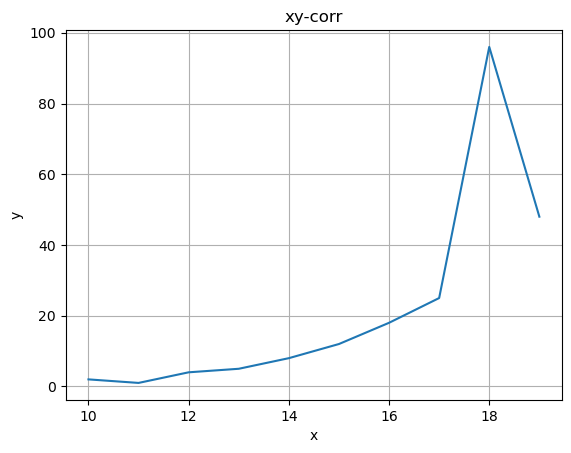

In [14]:

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy-corr')
plt.grid()
plt.show()

                            
                            x       y
                    x    1.00    0.76
                    y    0.76    1.00

In [5]:
r = np.corrcoef(x, y)
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [8]:
r[0, 1], r[1, 0]

(0.7586402890911867, 0.7586402890911869)

In [9]:
r[0, 0], r[1, 1]

(0.9999999999999999, 1.0)

In [17]:
scipy.stats.pearsonr(x, y)    # Pearson's r

PearsonRResult(statistic=0.7586402890911869, pvalue=0.010964341301680853)

In [18]:
scipy.stats.spearmanr(x, y)   # Spearman's rho

SignificanceResult(statistic=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [19]:
scipy.stats.kendalltau(x, y) # Kendall's tau

SignificanceResult(statistic=0.911111111111111, pvalue=2.9761904761904762e-05)

In [23]:
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with frame
df = load_diabetes(as_frame=True)
# conver into pandas dataframe
df = df.frame
# Print first 5 rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [24]:
# Find the pearson correlations matrix
corr = df.corr(method = 'pearson')
corr['max'] = 


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [25]:
# correaltions between age and sex columns
c = np.corrcoef(df['age'],df['sex'])
print('Correlations between age and sex\n',c)


Correlations between age and sex
 [[1.        0.1737371]
 [0.1737371 1.       ]]


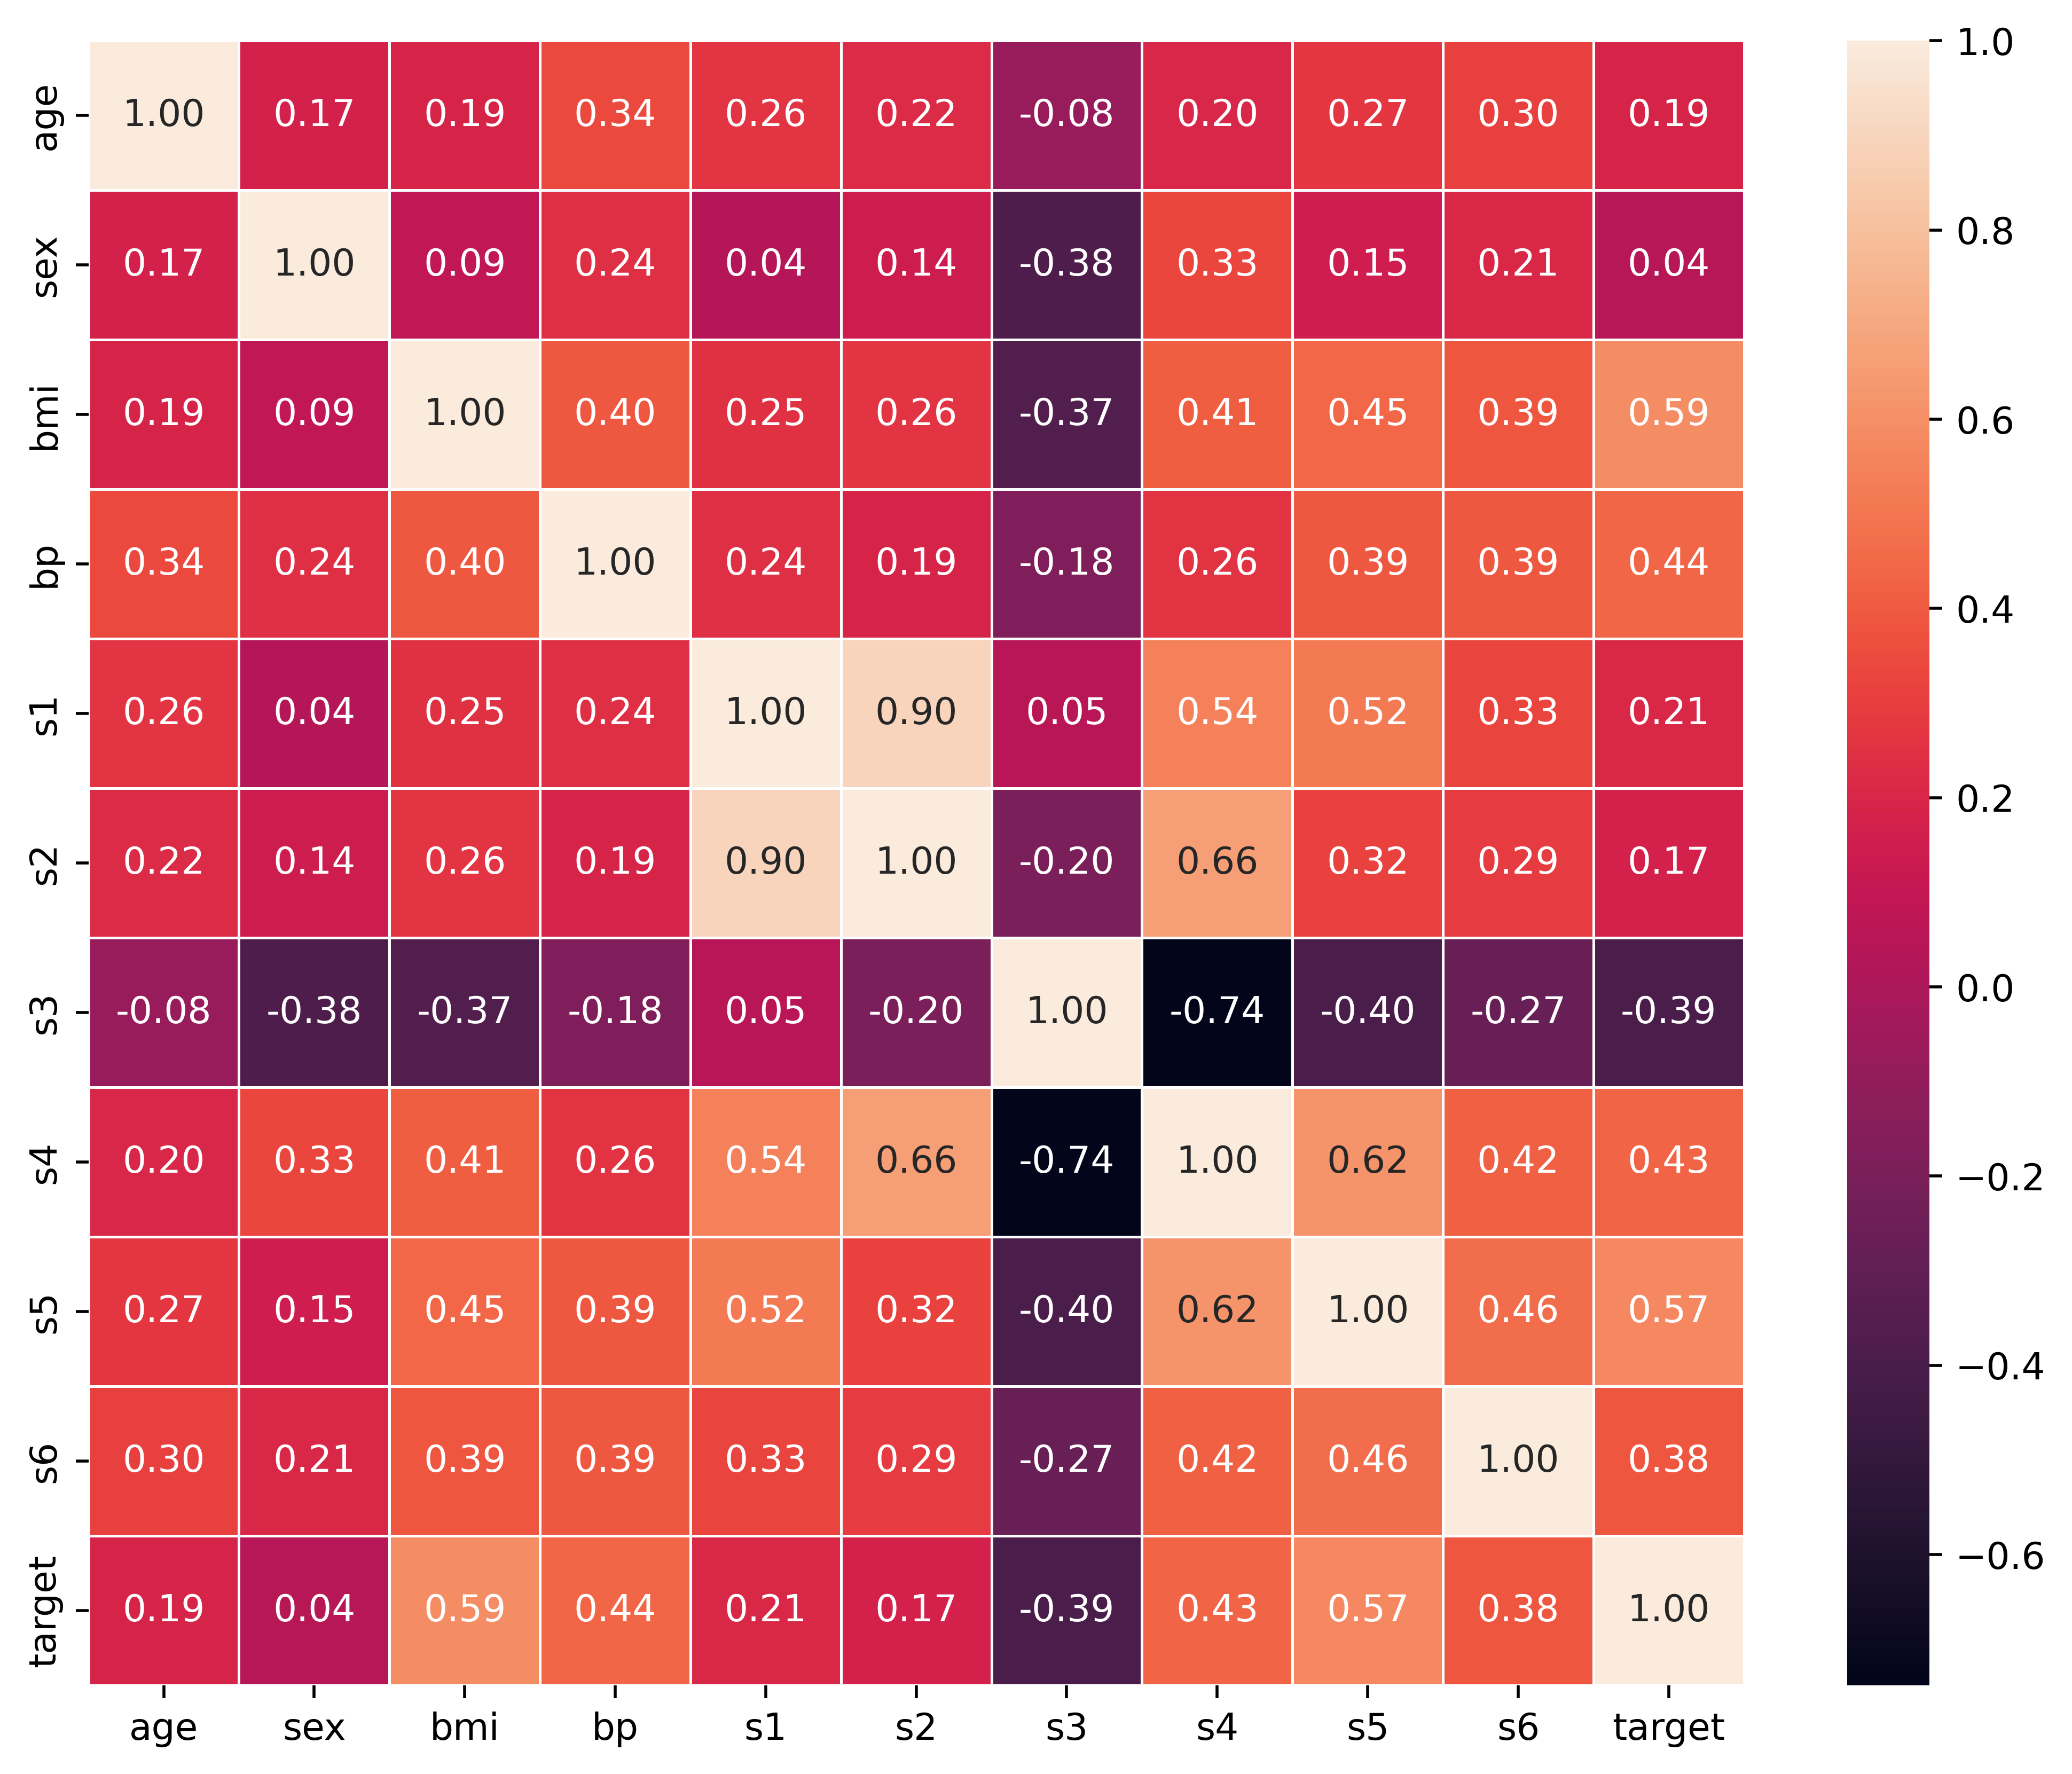

In [26]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()


# 2. $R^2$
- The R-squared value, denoted by $R^2$, is the square of the correlation. It measures the proportion of variation in the dependent variable that can be attributed to the independent variable.
- $R^2\ =\ 1- \frac{SS_{res}}{SS_{tot}}$
    - SSres is the sum of squares of the residual errors.
    - SStot is the total sum of the errors.
    
- x as feature vector, i.e $x = [x_1, x_2, …., x_n]$
- y as response vector, i.e $y = [y_1, y_2, …., y_n]$

In [27]:
from sklearn.metrics import r2_score 
### Assume y is the actual value and f is the predicted values 
y =[10, 20, 30] 
f =[10, 20, 30] 
r2 = r2_score(y, f) 
print('r2 score for perfect model is', r2) 


r2 score for perfect model is 1.0


In [28]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(f"r= {Pearson_correlation(x,y)}")
print(f"r^2= {r2_score(x,y)}")

r= 0.7586402890911869
r^2= -87.84848484848484


In [29]:
e = np.array(x)-np.array(y)
e

array([  8,  10,   8,   8,   6,   3,  -2,  -8, -78, -29])

In [32]:
(e*e).sum()/e.sum()

-99.05405405405405

- Linear Regression

In [33]:
import pandas as pd

#create DataFrame
df = pd.DataFrame(
{'hours': [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4, 3, 6],
 'prep_exams': [1, 3, 3, 5, 2, 2, 1, 1, 0, 3, 4, 3, 2],
 'score': [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90, 75, 96]})

In [34]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = df[["hours", "prep_exams"]], df.score

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.71755417141059


In [59]:
def calc_rsqred(x, y):
    # Input Vars
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    #initiate linear regression model
    model = LinearRegression()
    
    #fit regression model
    model.fit(x, y)

    #calculate R-squared of regression model
    r_squared = model.score(x, y)

    # return R-squared value
    return r_squared
    

In [60]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(f"r= {Pearson_correlation(x,y)}")
print(f"r^2= {r2_score(x,y)}")
print(f"r^2 reg= {calc_rsqred(x, y)}")

r= 0.7586402890911869
r^2= -87.84848484848484
r^2 reg= 0.5755350882323593


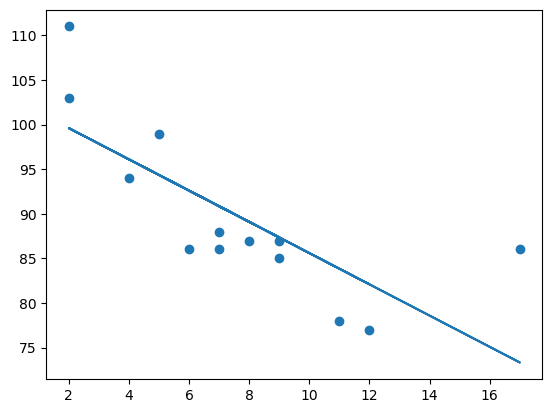

slope, intercept, r, p, std_err = (-1.7512877115526118, 103.10596026490066, -0.758591524376155, 0.0026468739224561064, 0.453536157607742)


In [58]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(f"slope, intercept, r, p, std_err = {slope, intercept, r, p, std_err}")

In [48]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)


In [49]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
        marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')


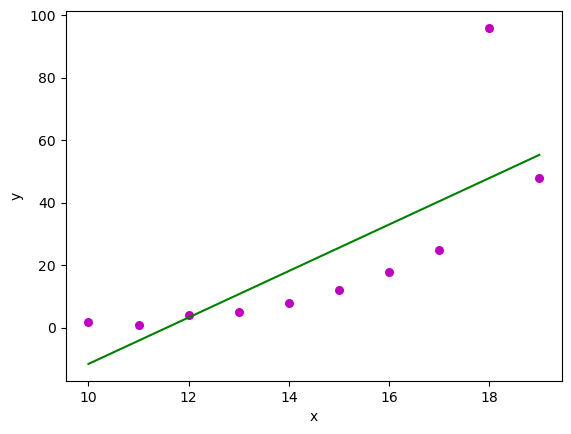

In [51]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
b = estimate_coef(x, y)
plot_regression_line(x, y, b)